In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal  import seasonal_decompose
import pmdarima
from pmdarima import  auto_arima
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.stattools import adfuller



In [2]:
Rvist=pd.read_csv(r'C:\Users\hp\OneDrive\Desktop\pandas python\RestaurantVisitors.csv',index_col="date",parse_dates=True)
# while reading file convert date into a index col 
# at pass parsh date 

# while reading file convert date into a index col 
# at pass parse date 

In [3]:
Rvist

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2016-01-01,Friday,1,New Year's Day,65.0,25.0,67.0,139.0,296.0
2016-01-02,Saturday,0,na,24.0,39.0,43.0,85.0,191.0
2016-01-03,Sunday,0,na,24.0,31.0,66.0,81.0,202.0
2016-01-04,Monday,0,na,23.0,18.0,32.0,32.0,105.0
2016-01-05,Tuesday,0,na,2.0,15.0,38.0,43.0,98.0
...,...,...,...,...,...,...,...,...
2017-05-27,Saturday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-28,Sunday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-29,Monday,1,Memorial Day,NaN,NaN,NaN,NaN,NaN


In [4]:
# to Check is there any Null OR Black value In data Set
Rvist.isnull().sum()
# As we can see the Some cols contains Null values

weekday          0
holiday          0
holiday_name     0
rest1           39
rest2           39
rest3           39
rest4           39
total           39
dtype: int64

In [5]:
Rvist.tail(40)
# those Nan Values are for the Forecasting/prediction for 1 Month Data that User want to Predict the Visitors

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2017-04-22,Saturday,0,na,97.0,20.0,50.0,59.0,226.0
2017-04-23,Sunday,0,na,NaN,NaN,NaN,NaN,NaN
2017-04-24,Monday,0,na,NaN,NaN,NaN,NaN,NaN
2017-04-25,Tuesday,0,na,NaN,NaN,NaN,NaN,NaN
2017-04-26,Wednesday,0,na,NaN,NaN,NaN,NaN,NaN
2017-04-27,Thursday,0,na,NaN,NaN,NaN,NaN,NaN
2017-04-28,Friday,0,na,NaN,NaN,NaN,NaN,NaN
2017-04-29,Saturday,0,na,NaN,NaN,NaN,NaN,NaN
2017-04-30,Sunday,0,na,NaN,NaN,NaN,NaN,NaN


# Using SARIMA we can handle Seasonality but can We Cannot handle external factors Such as Holiday

# So for that we need a SARIMAX`

In [6]:
Rvist=Rvist.dropna() # to remove nulls

In [7]:
Rvist.isnull().sum() # the Nulls are Removed Now

weekday         0
holiday         0
holiday_name    0
rest1           0
rest2           0
rest3           0
rest4           0
total           0
dtype: int64

In [8]:
Rvist.shape

(478, 8)

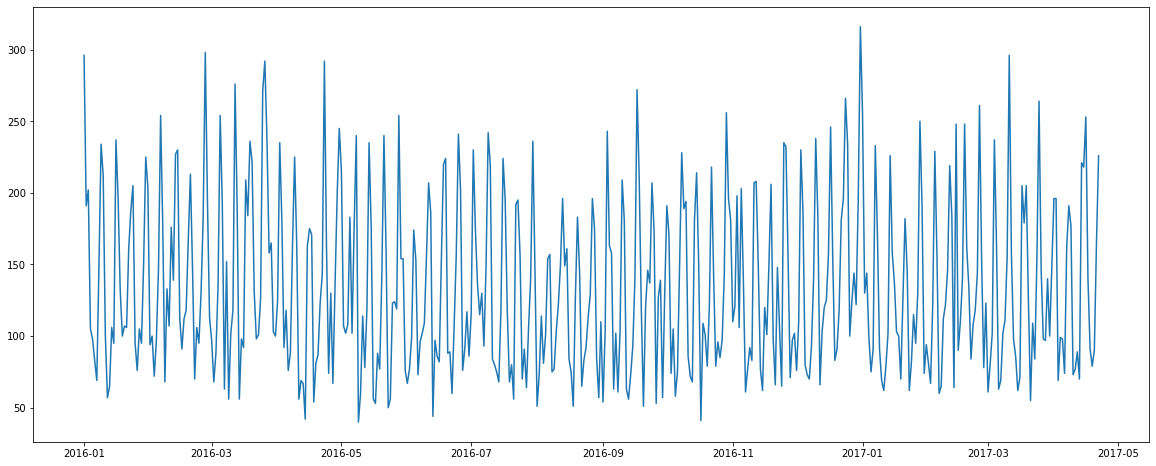

In [9]:
plt.figure(figsize=(20,8))
plt.plot(Rvist.total)# data is sationary

In [13]:
Rvist[Rvist.holiday==1] # explanationation purpose
# As we can see on holiday the Visitors are more 
# Usually on Sunday there are more visitors coming to Restraunt

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2016-01-01,Friday,1,New Year's Day,65.0,25.0,67.0,139.0,296.0
2016-01-18,Monday,1,Martin Luther King Day,10.0,19.0,19.0,84.0,132.0
2016-02-02,Tuesday,1,Groundhog Day,43.0,6.0,19.0,32.0,100.0
2016-02-14,Sunday,1,Valentine's Day,30.0,32.0,47.0,121.0,230.0
2016-02-15,Monday,1,Presidents Day,7.0,32.0,30.0,43.0,112.0
2016-03-17,Thursday,1,St. Patrick's Day,67.0,22.0,65.0,55.0,209.0
2016-03-25,Friday,1,Good Friday,75.0,91.0,64.0,41.0,271.0
2016-03-27,Sunday,1,Easter,25.0,61.0,47.0,104.0,237.0
2016-03-28,Monday,1,Easter Monday,35.0,21.0,58.0,44.0,158.0


In [14]:
index_pos=Rvist[Rvist.holiday==1].index # extrated the date where holiday is comming
index_pos

DatetimeIndex(['2016-01-01', '2016-01-18', '2016-02-02', '2016-02-14',
               '2016-02-15', '2016-03-17', '2016-03-25', '2016-03-27',
               '2016-03-28', '2016-05-05', '2016-05-08', '2016-05-30',
               '2016-06-19', '2016-07-04', '2016-09-05', '2016-10-10',
               '2016-10-31', '2016-11-11', '2016-11-24', '2016-11-25',
               '2016-12-24', '2016-12-25', '2016-12-31', '2017-01-01',
               '2017-01-16', '2017-02-02', '2017-02-14', '2017-02-20',
               '2017-03-17', '2017-04-14', '2017-04-16', '2017-04-17'],
              dtype='datetime64[ns]', name='date', freq=None)

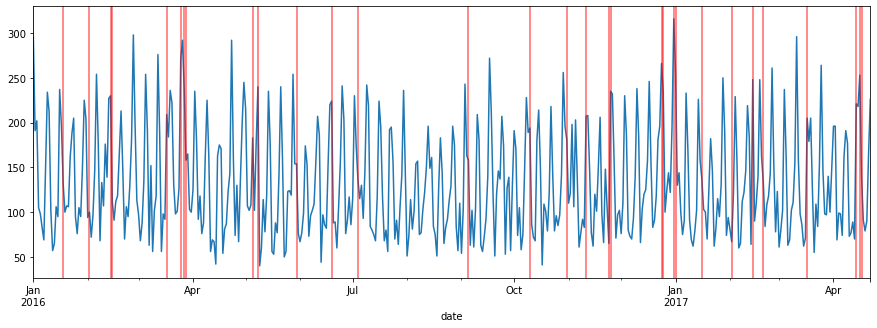

In [15]:
# this graph is just to show impact of holiday on sales
ax=Rvist['total'].plot(figsize=(15,5))
for day in index_pos:
    ax.axvline(x=day,color='r',alpha=.6)
# whene ever holidays are coming values sunddely increase which also means that
# while doing the forecasting we have to take care of holiday

# To check the Data is Seasonal or not We can use the Seasonal Decompose

In [16]:
Rvist_seasonal=seasonal_decompose(Rvist.total)

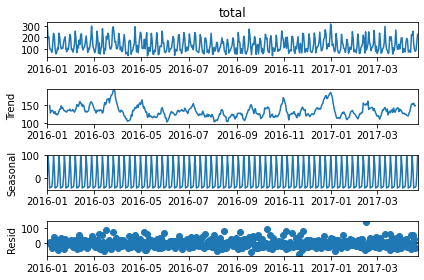

In [17]:
Rvist_seasonal.plot();
# from this data we are sure that is seasonality data

# ADF test(Agumented dickey fuller test)

# In ADF ho is that series is Not stionary.
# To check the data is Sationary or not.

In [19]:
from statsmodels.tsa.stattools import adfuller

In [23]:
adfuller(Rvist.total)
# 2nd number corresponds tp p-value which is .999 in this case

# since p value is less than >.05 which means we can reject the null
# so null is not valid i.e 
# Series is Stationary (is the final Outcome)


(-5.592496972543469,
 1.3193770946941885e-06,
 18,
 459,
 {'1%': -3.4446773373329576,
  '5%': -2.8678574606780654,
  '10%': -2.5701349669405404},
 4596.809727672799)

In [24]:
# Lets crete a Programe
def adf_test(input_series):
    from statsmodels.tsa.stattools import adfuller
    pvalue=adfuller(input_series)[1]
    if pvalue < .05:
        print("pvalue is ",pvalue)
        print('Since the pvalue is less than .05 we reject the null')
        print('Series is Stationary')
    else:
        print("pvalue is ",pvalue)
        print('Since the pvalue is greater than .05 we FAIL to reject the null')
        print('Series is NOT Stationary')
    

In [25]:
adf_test(Rvist.total)

pvalue is  1.3193770946941885e-06
Since the pvalue is less than .05 we reject the null
Series is Stationary


# KPSS(Kwiatkowski–Phillips–Schmidt–Shin) test For To check the Series is Stationary or Not

In [26]:
from statsmodels.tsa.stattools import kpss
# NOte
# IN KPSS Null Hypothesis Ho is that series is stationary

# Null in KPSS and ADF Is Just opposite 

In [30]:
kpss(Rvist.total)
# P value is .1 In this case  which is more than .05 So we can not reject the null
# series is stationary Ha
# But since cannot  reject the null Final conclusion is that Series is stationary

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


(0.20595582170555526,
 0.1,
 22,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

In [31]:
def kpss_test(input_series):
    from statsmodels.tsa.stattools import kpss
    pvalue=kpss(input_series)[1]
    if pvalue < .05:
        print("pvalue is ",pvalue)
        print('Since the pvalue is less than .05 we reject the null')
        print('Series is Not Stationary')
    else:
        print("pvalue is ",pvalue)
        print('Since the pvalue is greater than .05 we FAIL to reject the null')
        print('Series is  Stationary')

In [32]:
kpss_test(Rvist.total)

pvalue is  0.1
Since the pvalue is greater than .05 we FAIL to reject the null
Series is  Stationary


C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


In [150]:
rv.shape

(478, 8)

# lets do the sequential sampling on our data

In [35]:
train_rv=Rvist.iloc[0:450] # model build
test_rv=Rvist.iloc[450:479]# evalute the model

# lets run the autoarima and whatever values we get we will pass in the arima

In [36]:
auto_arima(Rvist.total,seasonal=True, m=7)
# we have to run auto arima on total data not on the train data
# after geting value u have to then run on the train data
# pass the value u get from the overall data to the seasonal data to predict
# the next values in your train data and the evalute the performance of the model

ARIMA(order=(0, 0, 0), scoring_args={}, seasonal_order=(1, 0, 1, 7),
      suppress_warnings=True)

In [37]:
# (order=(0, 0, 0) p,d,q
# seasonal_order=(1, 0, 1, 7) this order p,d,q,seasonal
# what ever values u get from auto arima pass them to sarima

In [38]:
model1=SARIMAX(train_rv.total,order=(0,0,0),seasonal_order=(1,0,1,7))

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [39]:
results=model1.fit()

In [40]:
pred_rv=results.predict(start=450, end=477,)

In [41]:
pred_rv

2017-03-26    174.188668
2017-03-27     90.608896
2017-03-28     95.760665
2017-03-29     95.480398
2017-03-30     96.687740
2017-03-31    145.285587
2017-04-01    232.776872
2017-04-02    174.177705
2017-04-03     90.603194
2017-04-04     95.754638
2017-04-05     95.474389
2017-04-06     96.681655
2017-04-07    145.276444
2017-04-08    232.762222
2017-04-09    174.166743
2017-04-10     90.597491
2017-04-11     95.748612
2017-04-12     95.468380
2017-04-13     96.675571
2017-04-14    145.267301
2017-04-15    232.747573
2017-04-16    174.155782
2017-04-17     90.591790
2017-04-18     95.742586
2017-04-19     95.462372
2017-04-20     96.669486
2017-04-21    145.258158
2017-04-22    232.732925
Freq: D, Name: predicted_mean, dtype: float64

In [69]:
pred_rv.round()

2017-03-26    174.0
2017-03-27     91.0
2017-03-28     96.0
2017-03-29     95.0
2017-03-30     97.0
2017-03-31    145.0
2017-04-01    233.0
2017-04-02    174.0
2017-04-03     91.0
2017-04-04     96.0
2017-04-05     95.0
2017-04-06     97.0
2017-04-07    145.0
2017-04-08    233.0
2017-04-09    174.0
2017-04-10     91.0
2017-04-11     96.0
2017-04-12     95.0
2017-04-13     97.0
2017-04-14    145.0
2017-04-15    233.0
2017-04-16    174.0
2017-04-17     91.0
2017-04-18     96.0
2017-04-19     95.0
2017-04-20     97.0
2017-04-21    145.0
2017-04-22    233.0
Freq: D, Name: predicted_mean, dtype: float64

In [80]:
# lets build a plot

In [70]:
df=pd.DataFrame()

In [71]:
df['Predicted']=pred_rv.round()

In [72]:
df

,Predicted
2017-03-26,174.0
2017-03-27,91.0
2017-03-28,96.0
2017-03-29,95.0
2017-03-30,97.0
2017-03-31,145.0
2017-04-01,233.0
2017-04-02,174.0
2017-04-03,91.0
2017-04-04,96.0


In [42]:
test_rv.total # explanation purpose

date
2017-03-26    146.0
2017-03-27     98.0
2017-03-28     97.0
2017-03-29    140.0
2017-03-30    100.0
2017-03-31    149.0
2017-04-01    196.0
2017-04-02    196.0
2017-04-03     69.0
2017-04-04     99.0
2017-04-05     98.0
2017-04-06     74.0
2017-04-07    162.0
2017-04-08    191.0
2017-04-09    177.0
2017-04-10     73.0
2017-04-11     77.0
2017-04-12     89.0
2017-04-13     70.0
2017-04-14    221.0
2017-04-15    218.0
2017-04-16    253.0
2017-04-17    140.0
2017-04-18     91.0
2017-04-19     79.0
2017-04-20     90.0
2017-04-21    165.0
2017-04-22    226.0
Name: total, dtype: float64

In [43]:
# lets evalute the model 
# find the error 

In [44]:
error=test_rv.total-pred_rv
error# to check the value explanation purpose 

date
2017-03-26   -28.188668
2017-03-27     7.391104
2017-03-28     1.239335
2017-03-29    44.519602
2017-03-30     3.312260
2017-03-31     3.714413
2017-04-01   -36.776872
2017-04-02    21.822295
2017-04-03   -21.603194
2017-04-04     3.245362
2017-04-05     2.525611
2017-04-06   -22.681655
2017-04-07    16.723556
2017-04-08   -41.762222
2017-04-09     2.833257
2017-04-10   -17.597491
2017-04-11   -18.748612
2017-04-12    -6.468380
2017-04-13   -26.675571
2017-04-14    75.732699
2017-04-15   -14.747573
2017-04-16    78.844218
2017-04-17    49.408210
2017-04-18    -4.742586
2017-04-19   -16.462372
2017-04-20    -6.669486
2017-04-21    19.741842
2017-04-22    -6.732925
dtype: float64

In [45]:
mse_model1=np.mean(np.square(error))
mse_model1 # this model was created without using the External Factor holiday variable part

875.5111678818388

In [46]:
test_rv[test_rv.holiday==1].index

DatetimeIndex(['2017-04-14', '2017-04-16', '2017-04-17'], dtype='datetime64[ns]', name='date', freq=None)

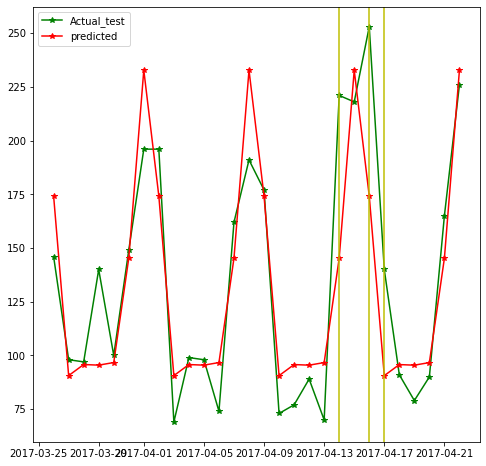

In [47]:
plt.figure(figsize= ( 8 , 8))
plt.plot(test_rv.total , marker  ="*" ,  color ="g"  , label ='Actual_test')
plt.plot(pred_rv , marker  ="*" ,  color ="r"  , label ='predicted')
plt.axvline(x = '2017-04-14' , color = 'y')
plt.axvline(x = '2017-04-16' , color = 'y')
plt.axvline(x = '2017-04-17' , color = 'y')
plt.legend()


<AxesSubplot:xlabel='date'>

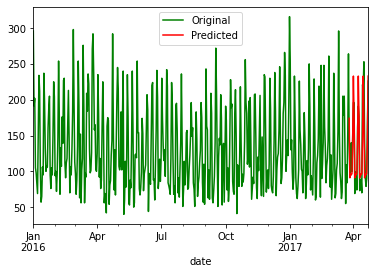

In [73]:
Rvist["total"].plot(legend=True,label='Original',color='g')
df["Predicted"].plot(legend=True,label='Predicted',color='r')

# normaly when hoilday comes there should be sundeen increase but the predicted value are fail to do so 
# we need to take in consideration of External Factor like holiday which has an impact on Total Visitor coming


In [50]:
auto_arima(Rvist.total,seasonal=True ,m=7,exog=Rvist[['holiday']])
# holiday one of the external factor but in some another data set there 
# can more than 1 external factor so when ever u  are passing and external factor
# pass in data frame [[]] using double braket
# when u take sigle braket[ ] is will take series

ARIMA(order=(0, 0, 0), scoring_args={}, seasonal_order=(1, 0, 1, 7),
      suppress_warnings=True)

In [51]:
type(Rvist.holiday)

pandas.core.series.Series

In [52]:
type(Rvist[['holiday']])

pandas.core.frame.DataFrame

In [53]:
model2=SARIMAX(train_rv.total,order=(1,0,0),seasonal_order=(1,0,1,7),exog=train_rv[['holiday']])

C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\hp\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [54]:
results2=model2.fit()

In [55]:
pred_rv2=results2.predict(start=450, end=477,exog=test_rv[['holiday']])
# better prediction is 
# wiliebuilding the model pass train
# while prediction pass test in exog

In [56]:
pred_rv2

2017-03-26    176.356083
2017-03-27     81.861307
2017-03-28     93.017375
2017-03-29     95.451475
2017-03-30     92.487978
2017-03-31    138.965372
2017-04-01    228.767406
2017-04-02    169.413086
2017-04-03     80.491796
2017-04-04     92.743318
2017-04-05     95.393052
2017-04-06     92.472205
2017-04-07    138.955265
2017-04-08    228.753738
2017-04-09    169.403184
2017-04-10     80.487113
2017-04-11     92.737938
2017-04-12     95.387520
2017-04-13     92.466843
2017-04-14    207.887752
2017-04-15    228.740475
2017-04-16    238.333905
2017-04-17    149.422990
2017-04-18     92.732561
2017-04-19     95.381990
2017-04-20     92.461482
2017-04-21    138.939152
2017-04-22    228.727212
Freq: D, Name: predicted_mean, dtype: float64

In [57]:
test_rv.total

date
2017-03-26    146.0
2017-03-27     98.0
2017-03-28     97.0
2017-03-29    140.0
2017-03-30    100.0
2017-03-31    149.0
2017-04-01    196.0
2017-04-02    196.0
2017-04-03     69.0
2017-04-04     99.0
2017-04-05     98.0
2017-04-06     74.0
2017-04-07    162.0
2017-04-08    191.0
2017-04-09    177.0
2017-04-10     73.0
2017-04-11     77.0
2017-04-12     89.0
2017-04-13     70.0
2017-04-14    221.0
2017-04-15    218.0
2017-04-16    253.0
2017-04-17    140.0
2017-04-18     91.0
2017-04-19     79.0
2017-04-20     90.0
2017-04-21    165.0
2017-04-22    226.0
Name: total, dtype: float64

In [74]:
df3=pd.DataFrame()

In [75]:
df3['Predicted']=pred_rv2.round()

In [76]:
df3

,Predicted
2017-03-26,176.0
2017-03-27,82.0
2017-03-28,93.0
2017-03-29,95.0
2017-03-30,92.0
2017-03-31,139.0
2017-04-01,229.0
2017-04-02,169.0
2017-04-03,80.0
2017-04-04,93.0


In [58]:
# lets evalute the model 
# find the error 

In [59]:
error=test_rv.total-pred_rv2
#error# to check the value explanation purpose 

In [60]:
mse_model2=np.mean(np.square(error))
mse_model2 # this model was created without using the holiday vala part

359.21162413630367

In [61]:
# 875.5111678818388 previously mse
# so MSE is reducing after taking care of holidays it implies model has imporved

In [62]:
# just for comparision 

In [63]:
df2=pd.DataFrame()

In [64]:
df2['original']=test_rv.total
df2['Pred_withoutHolidays']=pred_rv
df2['pred_withHoliday']=pred_rv2

In [65]:
df2 # we can see the values are improving

,original,Pred_withoutHolidays,pred_withHoliday
date,,,
2017-03-26,146.0,174.188668,176.356083
2017-03-27,98.0,90.608896,81.861307
2017-03-28,97.0,95.760665,93.017375
2017-03-29,140.0,95.480398,95.451475
2017-03-30,100.0,96.687740,92.487978
2017-03-31,149.0,145.285587,138.965372
2017-04-01,196.0,232.776872,228.767406
2017-04-02,196.0,174.177705,169.413086
2017-04-03,69.0,90.603194,80.491796


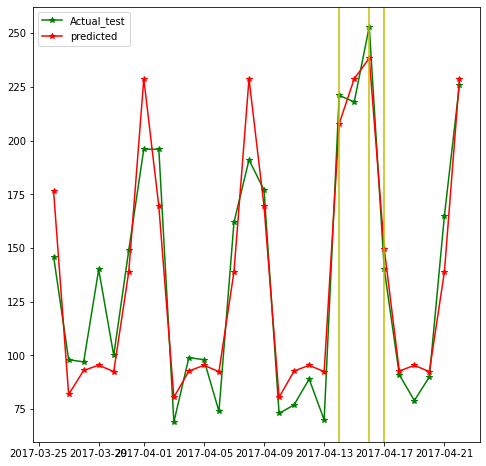

In [66]:
plt.figure(figsize= ( 8 , 8))
plt.plot(test_rv.total , marker  ="*" ,  color ="g"  , label ='Actual_test')
plt.plot(pred_rv2 , marker  ="*" ,  color ="r"  , label ='predicted')
plt.axvline(x = '2017-04-14' , color = 'y')
plt.axvline(x = '2017-04-16' , color = 'y')
plt.axvline(x = '2017-04-17' , color = 'y')
plt.legend()
# Yellow straight line indicate holiday

# we can see the graph as been improved as the predicted value are now showing
# increased the sudden on holiday unlike your previous one

<AxesSubplot:xlabel='date'>

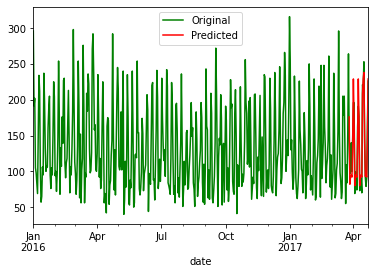

In [77]:
Rvist["total"].plot(legend=True,label='Original',color='g')
df3["Predicted"].plot(legend=True,label='Predicted',color='r')

<AxesSubplot:>

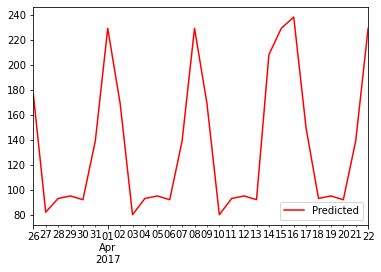

In [78]:
df3["Predicted"].plot(legend=True,label='Predicted',color='r')

# we can see the graph as been improved as the predicted value are now showing
# increased the sudden on holiday unlike your previous one